<a href="https://colab.research.google.com/github/JLMuehlbauer/Stroke_Prediction_Classification/blob/main/Stroke_Prediction_JacksonMuehlbauer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction**
---
Author: Jackson Muehlbauer

Date: 1/18/2023

---
## Purpose:
The purpose of this project is to predict the likelihood that certain at-risk individuals will have a stroke. This has the potential for certain life-saving treatments or lifestyle changes to be made to lower the likelihood that the predicted person would have a stroke. 


In [1]:
# Imports (for now)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
path = '/content/drive/My Drive/Colab Notebooks/Raw Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Exploring Data**
**This section will contain the following:**
- Deletion unneccesary columns
- Deletion duplicated rows
- Identification and addressing missing values
- Correction of inconsistent/impossible values
- Univariate plots for all features and target
- Identification outliers


In [4]:
for col in df.columns:
  print(f'For feature: {col}')
  print(df[col].nunique(), '\n')

For feature: id
5110 

For feature: gender
3 

For feature: age
104 

For feature: hypertension
2 

For feature: heart_disease
2 

For feature: ever_married
2 

For feature: work_type
5 

For feature: Residence_type
2 

For feature: avg_glucose_level
3979 

For feature: bmi
418 

For feature: smoking_status
4 

For feature: stroke
2 



The 'id' columns will be dropped as this will not be useful for modeling or data exploration. This is because it appears to be a unique value for each row. 

In [5]:
#Dropping 'id' column
df.drop(columns = 'id', inplace = True)
#Verification
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Checking for duplicated rows
df.duplicated().value_counts()

False    5110
dtype: int64

There are no duplicated rows to be dropped.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df['bmi'].isna().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

There exists 201 missing values for the 'bmi' feature. This will be imputed later (strategy determined later...)

In [9]:
#Checking for impossible values in numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


It's unusual for an age to be of type float and the minimum value to be 0.08. That said, there are no impossible values for numeric features. 

In [10]:
pd.set_option('display.max_rows', None)
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
26.00     62
46.00     62
71.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

It's strange that there are so many float type values in the age feature, that said, these values will not cause an issue with modeling and without being able to consult the dataset owner, I will chose to leave these values unmodified. It should also be noted that the float values appear to be in multiples of 0.08 which is approximately 1/12, in other words, 1 month. 

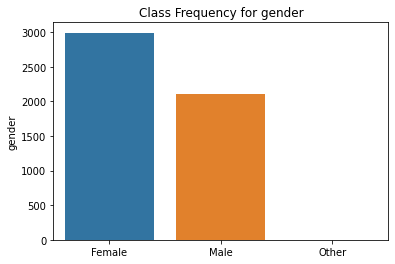

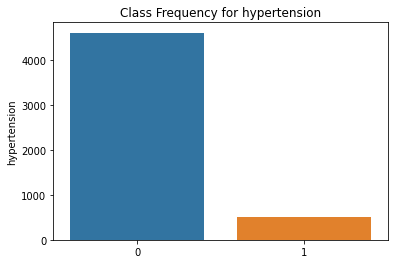

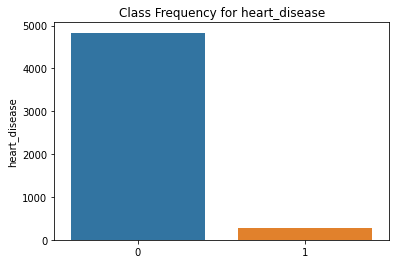

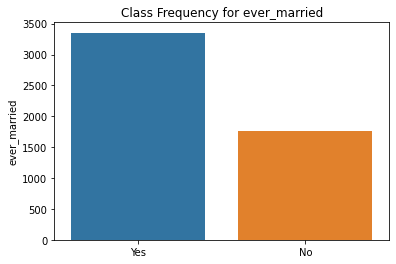

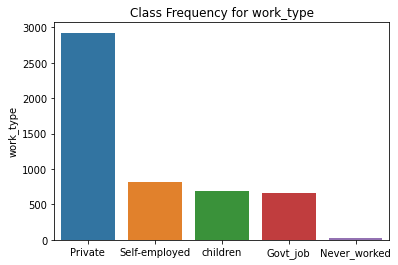

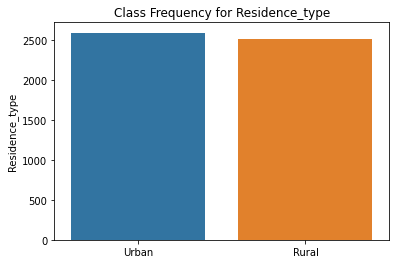

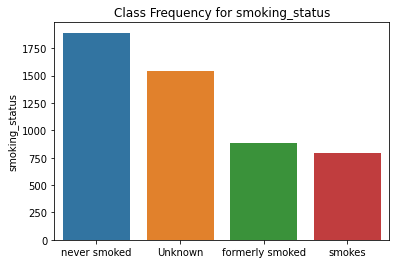

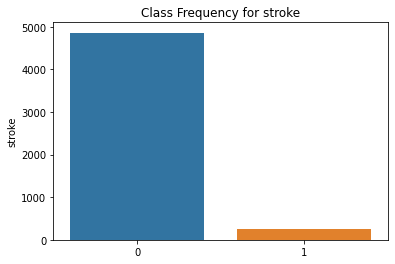

In [11]:
# For the categorical/boolean features, I will plan to plot these as frequency bar plots
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
  df_temp = df[col].value_counts().to_frame()
  #print(df_temp)
  fig, ax = plt.subplots()
  sns.barplot(x = df_temp.index, y = df_temp[col], ax = ax)
  ax.set_title(f'Class Frequency for {col}')

**Interpretation:**

Many of these features have significant class imbalances. Specifically, 'other' in gender, 1 for hypertension, 1 for heart_disease, 'Never_worked' for work_type, and 1 for stroke. This should be kept in mind when modeling especially since the target to predict is 1 for stroke. 

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


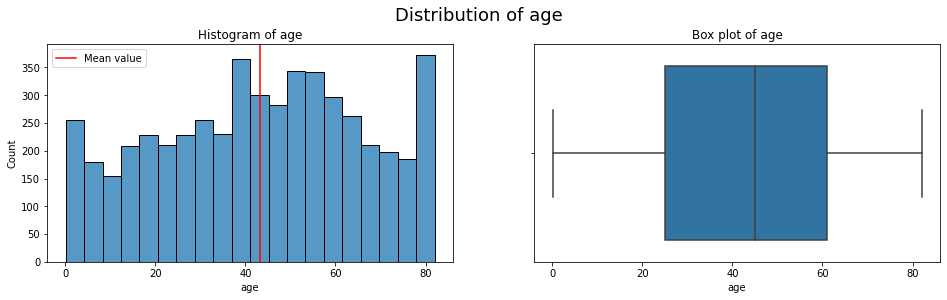

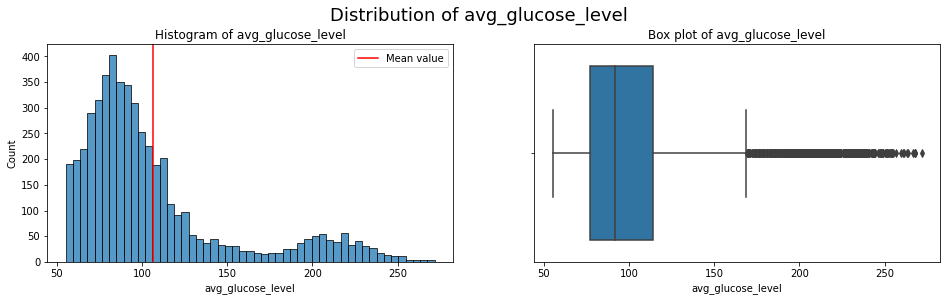

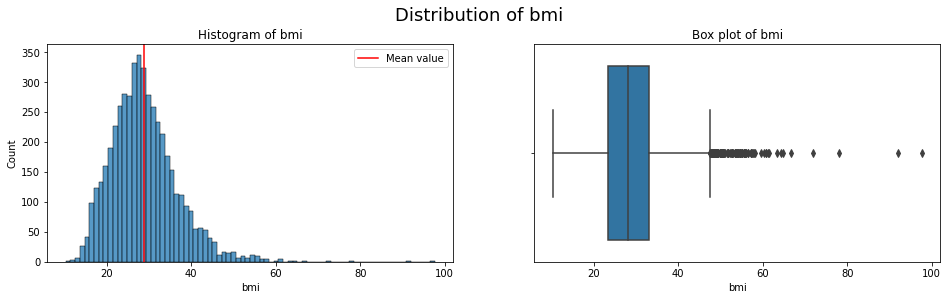

In [13]:
# Univariate plots for numeric columns
for col in ['age', 'avg_glucose_level', 'bmi']:
  fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (16, 4));
  sns.histplot(x = df[col], ax = axes[0]);
  axes[0].set_title(f'Histogram of {col}')
  axes[0].axvline(x = df[col].mean(), label = 'Mean value', c = 'red')
  axes[0].legend()
  sns.boxplot(x = df[col], ax = axes[1]);
  axes[1].set_title(f'Box plot of {col}')
  fig.suptitle(f'Distribution of {col}', fontsize = 18, y = 1.01);

**Interpretation:**
- Age appears to be mostly evenly distributed with a slight uptick for the oldest age range bin. There are slightly more instances in the 36-65 year range. 
- avg_glucose_level appears to have a bimodal distribution. There appears to be a peak around 78 and 220. The boxplot labeled the second mode, to be entirely outliers as this outlier detection technique assumes a near-normal distribution.
- BMI appears to be have a normal distribution, however, there is a long tail towards the largest values. These values have been correctly identified as outliers. 

##Explaining Data
**This section will contain the following:**
- Correlation Heatmap
- Multivariate Plots
- Key Findings Plots


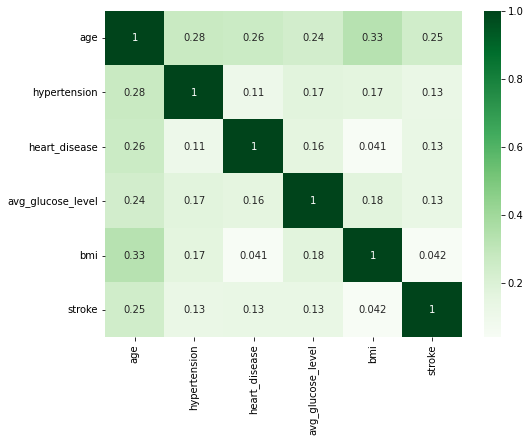

In [14]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, cmap = 'Greens', annot = True);

**Interpretation:**
None of the displayed features in the above plot are very highly correlated to having a stroke. Age has the strongest correlation to strokes with a value of 0.25. For a rare seemingly random event such as a stroke, its likely that there isn't a single feature that is highly correlated.

It should also be noted that the features are not particularly correlated with one another either. There is a modest correlation between age and BMI at 0.33. 

**Exploration of categorical features with respect to strokes**

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

,gender,stroke,stroke percent,counts
0,Female,0,0.952906,2853
1,Female,1,0.047094,141
2,Male,0,0.948936,2007
3,Male,1,0.051064,108
4,Other,0,1.000000,1


,ever_married,stroke,stroke percent,counts
0,No,0,0.983495,1728
1,No,1,0.016505,29
2,Yes,0,0.934387,3133
3,Yes,1,0.065613,220


,work_type,stroke,stroke percent,counts
0,Govt_job,0,0.949772,624
1,Govt_job,1,0.050228,33
2,Never_worked,0,1.000000,22
3,Private,0,0.949060,2776
4,Private,1,0.050940,149
5,Self-employed,0,0.920635,754
6,Self-employed,1,0.079365,65
7,children,0,0.997089,685
8,children,1,0.002911,2


,Residence_type,stroke,stroke percent,counts
0,Rural,0,0.954654,2400
1,Rural,1,0.045346,114
2,Urban,0,0.947997,2461
3,Urban,1,0.052003,135


,smoking_status,stroke,stroke percent,counts
0,Unknown,0,0.969560,1497
1,Unknown,1,0.030440,47
2,formerly smoked,0,0.920904,815
3,formerly smoked,1,0.079096,70
4,never smoked,0,0.952431,1802
5,never smoked,1,0.047569,90
6,smokes,0,0.946768,747
7,smokes,1,0.053232,42


,hypertension,stroke,stroke percent,counts
0,0,0,0.960321,4429
1,0,1,0.039679,183
2,1,0,0.867470,432
3,1,1,0.132530,66


,heart_disease,stroke,stroke percent,counts
0,0,0,0.958213,4632
1,0,1,0.041787,202
2,1,0,0.829710,229
3,1,1,0.170290,47


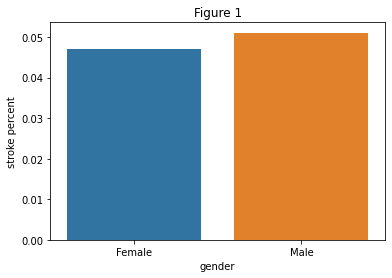

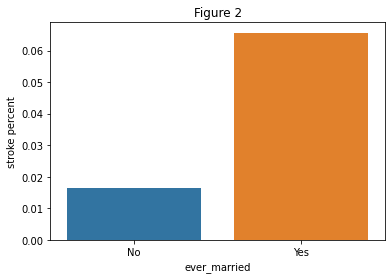

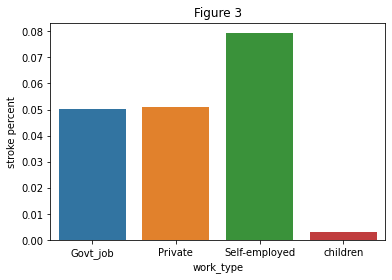

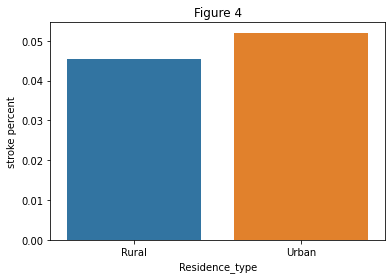

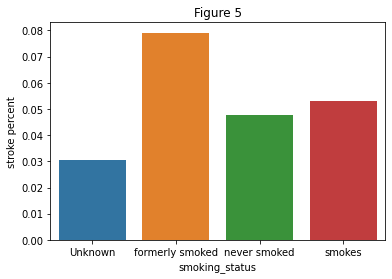

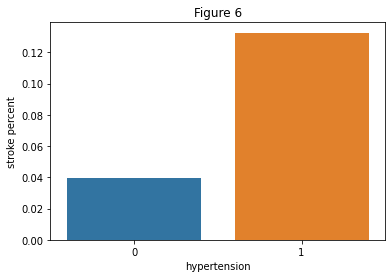

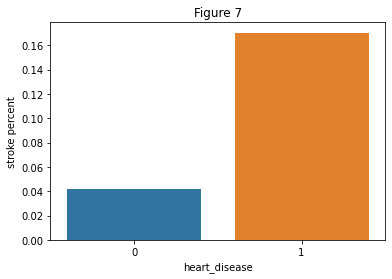

In [16]:
#For all categorical features, plot the percent of each classes's population that experienced a stroke

for i, col in enumerate(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']):
  # Group the dataframe by the classes in the categorical feature, 
  # get the normalized value counts for strokes for each class
  df_temp = df.groupby(col)['stroke'].value_counts(normalize = 'true').to_frame(name = 'stroke percent').reset_index()
  df_temp['counts'] = df.groupby(col)['stroke'].value_counts().to_frame(name = 'strokes').reset_index()['strokes']
  display(df_temp)
  print('\n')
  # Filter the dataframes to only those that had strokes
  stroke_filter = df_temp['stroke'] == 1;
  plt.figure();
  sns.barplot(data = df_temp.loc[stroke_filter, :], x = col, y = 'stroke percent', ci = False);
  plt.title(f'Figure {i+1}')

**Interpretation:**
1. Figure 1 shows that males are slightly more likely to experience a stroke the females, but it's roughly even at around 5%.
2. Figure 2 shows that those that have been married have experienced strokes at roughly 3 times the rate as those who never married. That said, this feature could be correlated to age, the likelihood of ever marrying is potentially closely tied to age. 
3. Figure 3, shows that children experience strokes at a much lower rate than those that are self-employed or work in the private or public sectors. This is another case where the age of the person is heavily correlated to this feature. Furthermore, those that are self-employed are the most likely to have experienced a stroke. 
4. Figure 4 shows a slightly higher rate of strokes among those living in the city over rural residents. 
5. Figure 5 shows that the highest rate of strokes are among former smokers, followed by smokers, non-smokers, and unknown. It's unclear as to why the unknown category has the lowest rate as the entirety of that class should be able to be categorized in the other classes. 
6. Figure 6 shows that there is a higher rate of strokes in the population with hypertension. 
7. Figure 6 shows that there is a higher rate of strokes in the population with disease. 

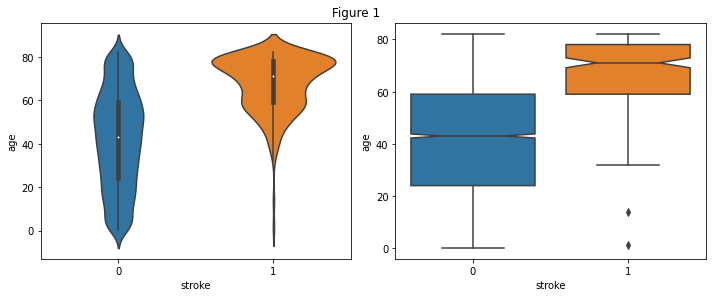

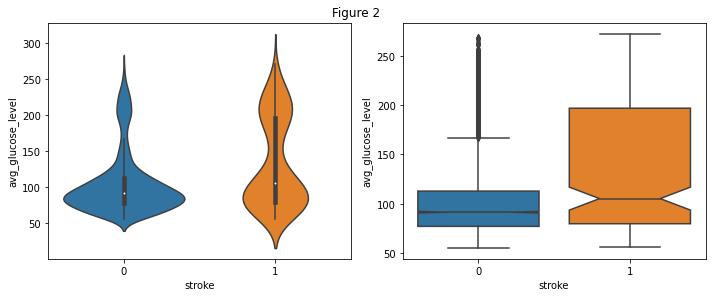

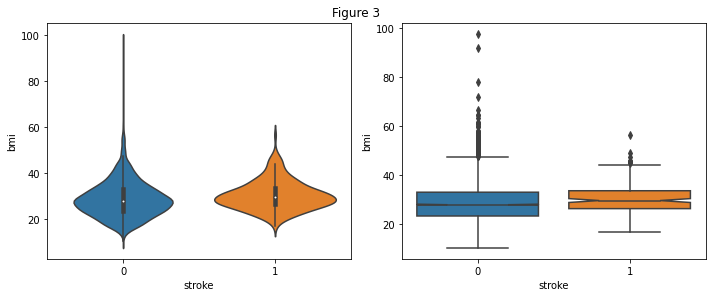

In [17]:
# Violin plots of the numeric continuous features grouped by stroke column
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
  fig, axes = plt.subplots(ncols=2, nrows = 1, figsize = (10, 4))
  sns.violinplot(data = df, x = 'stroke', y = col, ax = axes[0])
  sns.boxplot(data = df, x = 'stroke', y = col, ax = axes[1], notch = True)
  fig.suptitle(f'Figure {i+1}', y = 1.022)
  plt.tight_layout()

**Interpretations:**
1. Figure 1 shows the correlation between age and strokes. The upward shifting of the distribution as shown in the violin plot indicates that those that experience stroke tend to be older. The notched boxplot shows with greater than 95% confidence that the medians of the two populations are different, as indicated by the lack of overlapping of the notches. The box plot also shows that very few people under 30 year old experience strokes and those that do are considered outliers, 
2. Figure 2 indicates the there may be a slight distribution change of glucose levels for those that did and did not experience strokes. The fact that the second (upper) mode in the stroke having violin plot appear to be more equal in width to the lower mode than the same modes in the no stroke population, indicates that higher glucose levels may be correlated to a higher rate of strokes. The notched boxplot also shows that the median is statistically higher for the stroke having population than the no stroke population. 
3. Figure 3 shows a lack of correlation between BMI and strokes. This is evident by how similar the violin (and box) plots look across the two populations. 

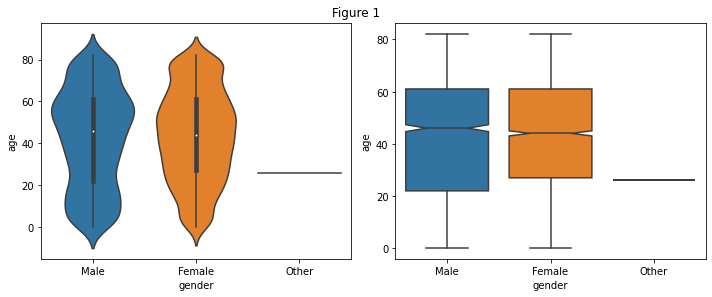

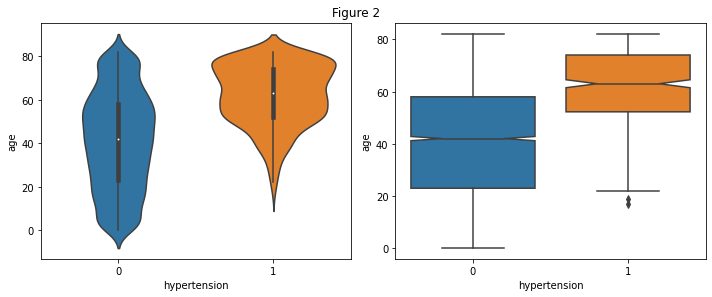

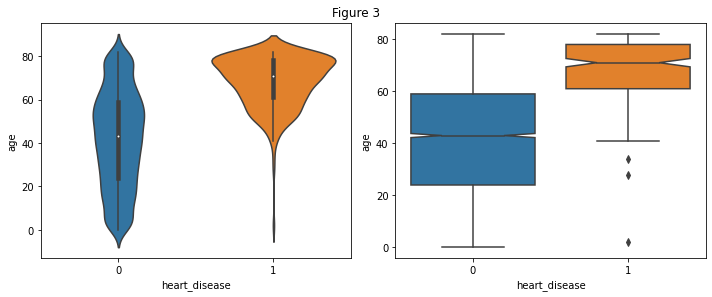

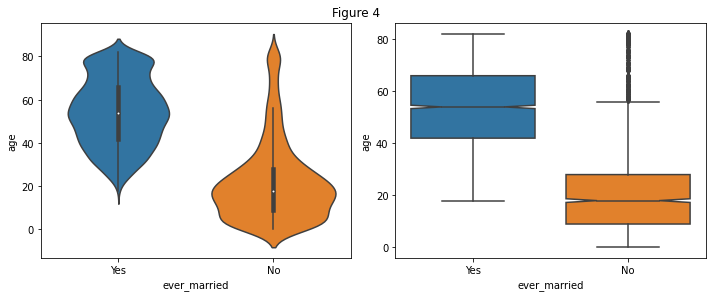

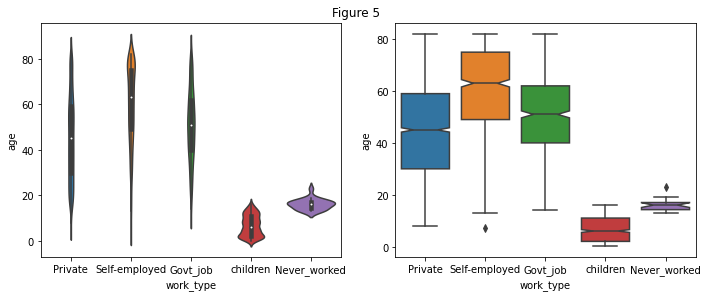

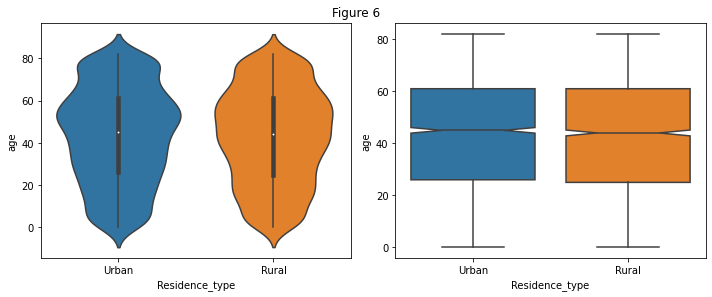

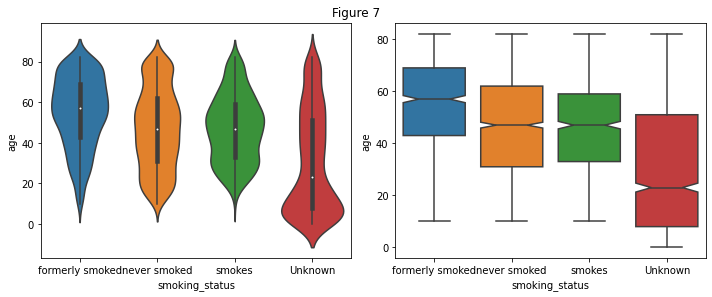

In [18]:
# I suspect that many of the features are correlated to one another, specifically age.
# Thus, I will plot these relationships
for i, col in enumerate(['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']):
  fig, axes = plt.subplots(ncols=2, nrows = 1, figsize = (10, 4))
  sns.violinplot(data = df, x = col, y = 'age', ax = axes[0])
  sns.boxplot(data = df, x = col, y = 'age', ax = axes[1], notch = True)
  fig.suptitle(f'Figure {i+1}', y = 1.022)
  plt.tight_layout()


**Interpretation:**

These plots show how many of these categorical features are also correlated with age. The correlated features include heart disease, hypertension, if the person has ever married, their employment status, and even if their smoking status is known. It's been shown that age is also one of the stronger correlated features to whether or not the patient experiences a stroke. Because of this, it's difficult to determine which features are actually relevant to experiencing a stroke. 

##Reporting Quality Plot #1

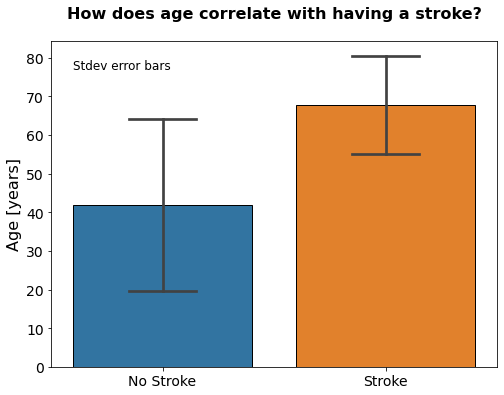

In [19]:
# Age and strokes as bar plot
labels_map = ['No Stroke', 'Stroke']
plt.figure(figsize = (8, 6));
sns.barplot(data = df, x = 'stroke', y = 'age', ci = 'sd', capsize = 0.3, edgecolor = 'k');
plt.xlabel(None);
plt.ylabel('Age [years]', fontsize = 16);
plt.xticks(ticks = [0, 1], labels = labels_map, fontsize = 14);
plt.yticks(fontsize = 14);
plt.title('How does age correlate with having a stroke?', fontsize = 16, fontweight = 'bold', y = 1.05 );
plt.text(x = -0.4, y = 77, s = 'Stdev error bars', fontsize = 12);


**Interpretation:**

Patients that experience strokes tend to be older. The smaller standard deviation for the strokes havers indicates a tighter distribution around the older ages. As mentioned earlier, this could also be related to age being correlated to other potential risk factors such as heart disease. 

Exploring how certain features correlate to stroke when only looking at individuals over 60. 

In [20]:
# Filtering for individuals over 60
age_filter = df['age'] > 60
df_old = df.loc[age_filter, :]
df_old.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1304.000000,1304.000000,1304.000000,1304.000000,1217.000000,1304.000000
mean,71.506135,0.216258,0.161043,122.045222,29.873377,0.135736
std,6.721973,0.411850,0.367712,58.084227,6.020397,0.342640
min,61.000000,0.000000,0.000000,55.230000,11.300000,0.000000
25%,65.000000,0.000000,0.000000,79.192500,26.000000,0.000000
50%,71.000000,0.000000,0.000000,97.070000,29.100000,0.000000
75%,78.000000,0.000000,0.000000,174.197500,33.400000,0.000000
max,82.000000,1.000000,1.000000,271.740000,60.200000,1.000000


,ever_married,stroke,stroke percent,counts
0,No,0,0.800000,80
1,No,1,0.200000,20
2,Yes,0,0.869601,1047
3,Yes,1,0.130399,157


,work_type,stroke,stroke percent,counts
0,Govt_job,0,0.879121,160
1,Govt_job,1,0.120879,22
2,Private,0,0.852897,574
3,Private,1,0.147103,99
4,Self-employed,0,0.875278,393
5,Self-employed,1,0.124722,56


,smoking_status,stroke,stroke percent,counts
0,Unknown,0,0.872428,212
1,Unknown,1,0.127572,31
2,formerly smoked,0,0.856383,322
3,formerly smoked,1,0.143617,54
4,never smoked,0,0.862745,440
5,never smoked,1,0.137255,70
6,smokes,0,0.874286,153
7,smokes,1,0.125714,22


,hypertension,stroke,stroke percent,counts
0,0,0,0.877691,897
1,0,1,0.122309,125
2,1,0,0.815603,230
3,1,1,0.184397,52


,heart_disease,stroke,stroke percent,counts
0,0,0,0.8766,959
1,0,1,0.1234,135
2,1,0,0.8000,168
3,1,1,0.2000,42


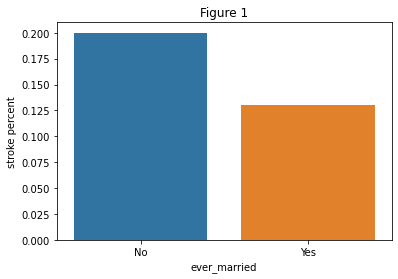

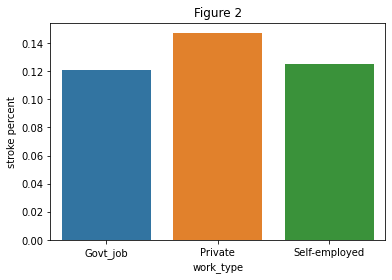

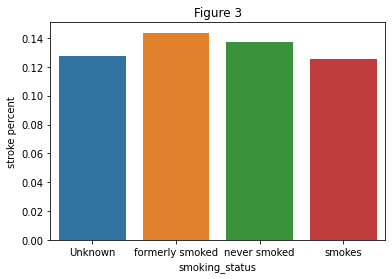

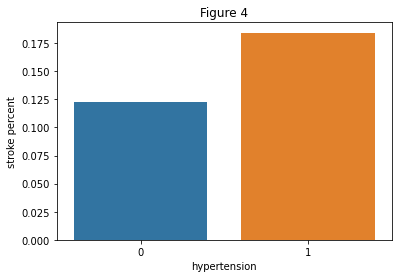

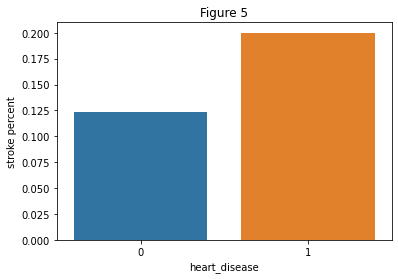

In [21]:
# Only going to explore features that are moderately correlated to age
for i, col in enumerate(['ever_married', 'work_type', 'smoking_status', 'hypertension', 'heart_disease']):
  # Group the dataframe by the classes in the categorical feature, 
  # get the normalized value counts for strokes for each class
  df_temp = df_old.groupby(col)['stroke'].value_counts(normalize = 'true').to_frame(name = 'stroke percent').reset_index()
  df_temp['counts'] = df_old.groupby(col)['stroke'].value_counts().to_frame(name = 'strokes').reset_index()['strokes']
  display(df_temp)
  print('\n')
  # Filter the dataframes to only those that had strokes
  stroke_filter = df_temp['stroke'] == 1;
  plt.figure();
  sns.barplot(data = df_temp.loc[stroke_filter, :], x = col, y = 'stroke percent', ci = False);
  plt.title(f'Figure {i+1}')

**Interpretation**
After filtering the data for only those older than 60, many of the trends have changed. Figure 1 now shows that never marrying actually increases the stroke rate. The work type and smoking status also appear much flatter across the classes which indicate that these features are not very correlated to strokes. That said, even after this sudo-decorrelation of the features with age, hypertension and heart disease still appear to be correlated to strokes. 

## Reporting Quality Plot #2

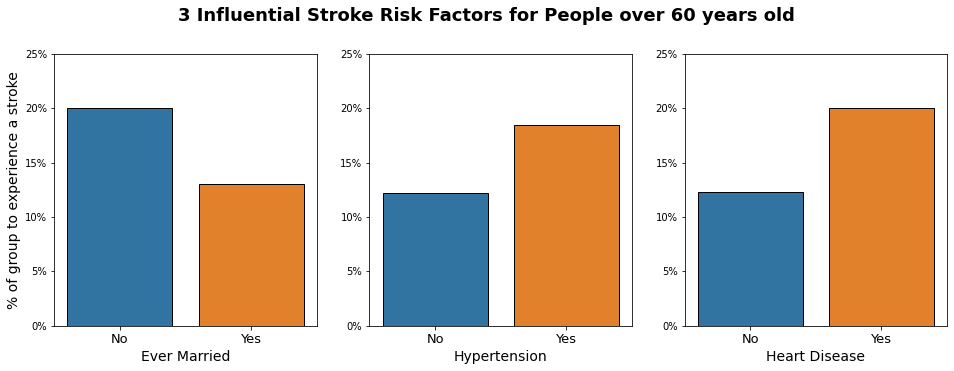

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
# Replicate the plots from above
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize = (16, 5));
fig.suptitle('3 Influential Stroke Risk Factors for People over 60 years old', fontweight = 'bold', fontsize = 18, y = 1.01);

# Remaking the filtered dataframe with patient over 60
age_filter = df['age'] > 60
df_old = df.loc[age_filter, :]


#Plotting each feature
for i, col in enumerate(['ever_married', 'hypertension', 'heart_disease']):
  df_temp = df_old.groupby(col)['stroke'].value_counts(normalize = 'true').to_frame(name = 'stroke percent').reset_index()
  df_temp['counts'] = df_old.groupby(col)['stroke'].value_counts().to_frame(name = 'strokes').reset_index()['strokes']
  # Filter the dataframes to only those that had strokes
  stroke_filter = df_temp['stroke'] == 1;
  plt.figure();
  sns.barplot(data = df_temp.loc[stroke_filter, :], x = col, y = 'stroke percent', ci = False, ax = axes[i], edgecolor = 'k');
  # Add % symbol on yticks
  
  axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1, decimals = 0));
  axes[i].set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25]);
  axes[i].set_ylabel('% of group to experience a stroke', fontsize = 14);
  axes[i].set_xticklabels(['No', 'Yes'], fontsize = 13)

  if i != 0:
    axes[i].set_ylabel('');

axes[0].set_xlabel('Ever Married', fontsize = 14);
axes[1].set_xlabel('Hypertension', fontsize = 14);
axes[2].set_xlabel('Heart Disease', fontsize = 14);


**Interpretation**

The three barchart show correlation between the features and higher rates of strokes for individuals over 60 years old. This is shown by the difference in stroke rate between the positive and negative (Yes and No) groups. The age filtering was done in attempt to decorrelate these features with the age column. After this decorrelation, there still appears to be some increase in strokes for those that never married, have hypertension and have heart disease. 

Note: There are better ways to decorrelated features, there is likele still correlation between the age column and the displayed features above. 

#Machine Learning
---
- Preprocessing
- Exploration & Tuning
- Final Model


In [23]:
# Machine learning imports
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Undersampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
# Import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as smote_pipe

# PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Models
#Dummy
from sklearn.dummy import DummyClassifier
# XGBoost
from xgboost import XGBClassifier
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Viewing
from sklearn import set_config
set_config(display='diagram')

# Classification Metrics
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
# Making a copy of dataframe for machine learning
df_ml  = df.copy()

# Feature and Target instantiation
X = df_ml.drop(columns = 'stroke')
y = df_ml['stroke']

# Validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [26]:
# Instantiate columne selector
nums = make_column_selector(dtype_include = 'number')
cats = make_column_selector(dtype_include = 'object')

# Instantiate Imputer for missing values in BMI (numeric)
# Using median due to the large number of right shifted outliers
imputer = SimpleImputer(strategy = 'median')

# Instantiate transformers
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = StandardScaler() 

# Numeric pipeline
num_pipe = make_pipeline(imputer, scaler)

# Tuples
num_tup = (num_pipe, nums)
cat_tup = (ohe, cats)

# Baselining preprocessor
preprocessor = make_column_transformer(num_tup, cat_tup, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f814a57f9d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f814a57ffa0>)])

In [27]:
y.value_counts(normalize = 'true')

0    0.951272
1    0.048728
Name: stroke, dtype: float64

There is significant class imbalance in the target as only 5% of the people in this dataset experience a stroke. I will use 3 approaches to navigate this:

1. Leave data as-is (baseline)
2. Undersample
3. SMOTE, synthetic oversampling

In [59]:
# Model pipelines
# Baseline models
dummy_pipe_base = make_pipeline(preprocessor, DummyClassifier()).fit(X_train, y_train)
xgb_pipe_base = make_pipeline(preprocessor, XGBClassifier()).fit(X_train, y_train)
lg_pipe_base = make_pipeline(preprocessor, LogisticRegression()).fit(X_train, y_train)
knn_pipe_base = make_pipeline(preprocessor, KNeighborsClassifier()).fit(X_train, y_train)


# Undersample models
dummy_pipe_under = make_sampler_pipeline(preprocessor, RandomUnderSampler(), DummyClassifier()).fit(X_train, y_train)
xgb_pipe_under = make_sampler_pipeline(preprocessor, RandomUnderSampler(), XGBClassifier()).fit(X_train, y_train)
lg_pipe_under = make_sampler_pipeline(preprocessor, RandomUnderSampler(), LogisticRegression()).fit(X_train, y_train)
knn_pipe_under = make_sampler_pipeline(preprocessor, RandomUnderSampler(), KNeighborsClassifier()).fit(X_train, y_train)


# SMOTE models
dummy_pipe_smote = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), DummyClassifier()).fit(X_train, y_train)
xgb_pipe_smote = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), XGBClassifier()).fit(X_train, y_train)
lg_pipe_smote = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), LogisticRegression()).fit(X_train, y_train)
knn_pipe_smote = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), KNeighborsClassifier()).fit(X_train, y_train)

In [29]:
# Evaluation function provided by Coding Dojo
def evaluate_classification(model_pipe, X_test, y_test, label="Test Data"):
  test_preds = model_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  plt.show()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Dummy with base data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


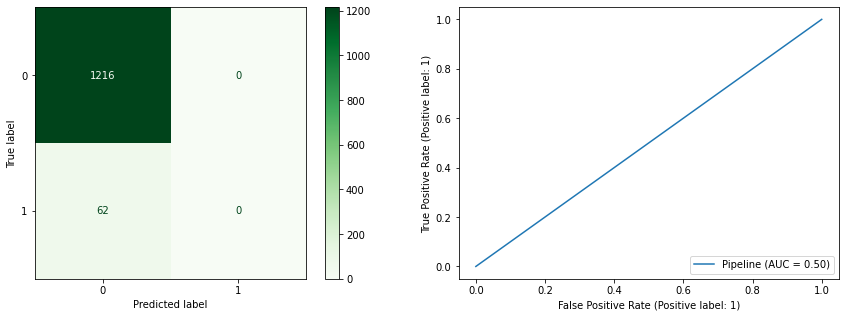

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost with base data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


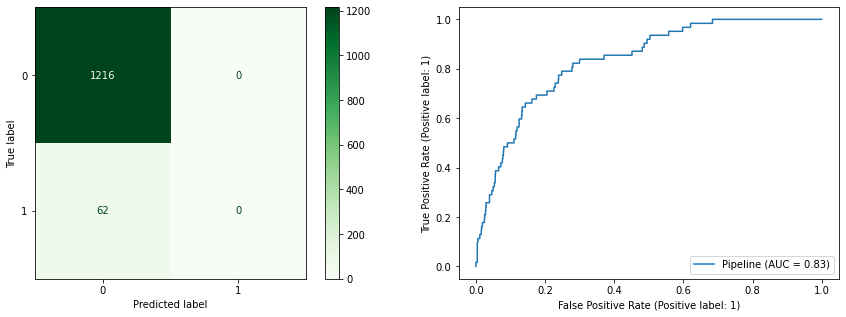

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: LogReg with base data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       1.00      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278



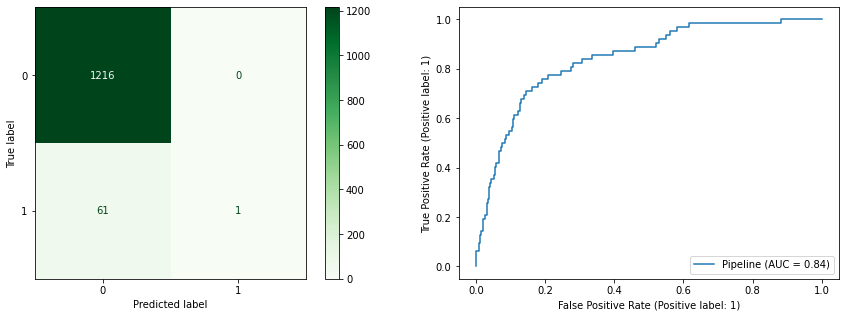

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN with base data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



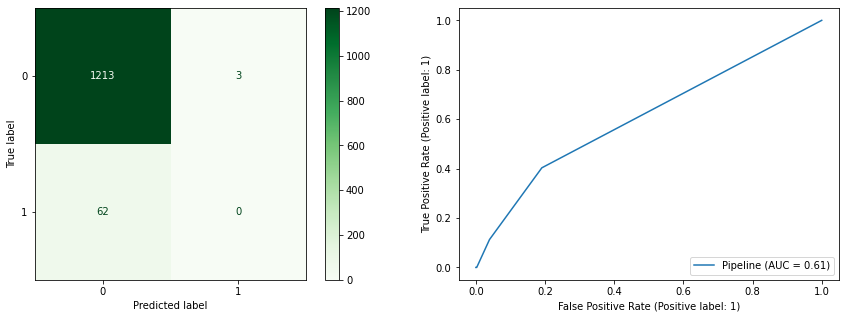

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Dummy with undersampled data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


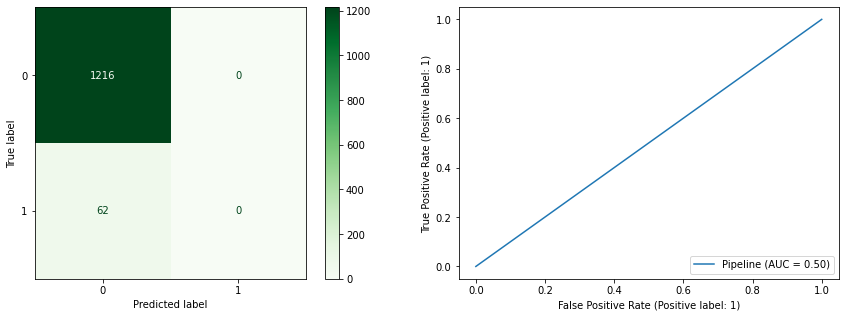

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost with undersampled data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1216
           1       0.12      0.81      0.21        62

    accuracy                           0.70      1278
   macro avg       0.55      0.75      0.51      1278
weighted avg       0.94      0.70      0.79      1278



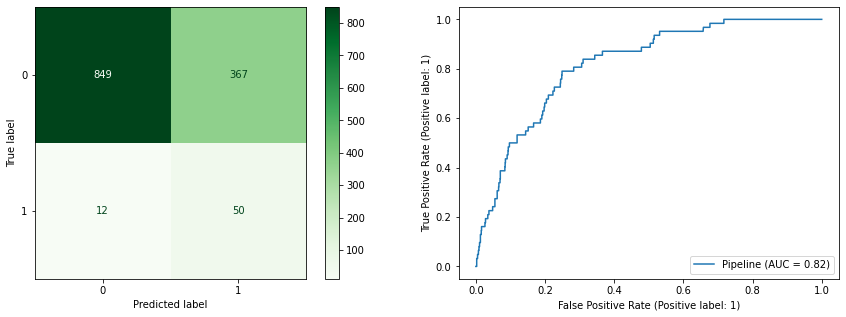

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: LogReg with undersampled data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1216
           1       0.13      0.79      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.74      0.81      1278



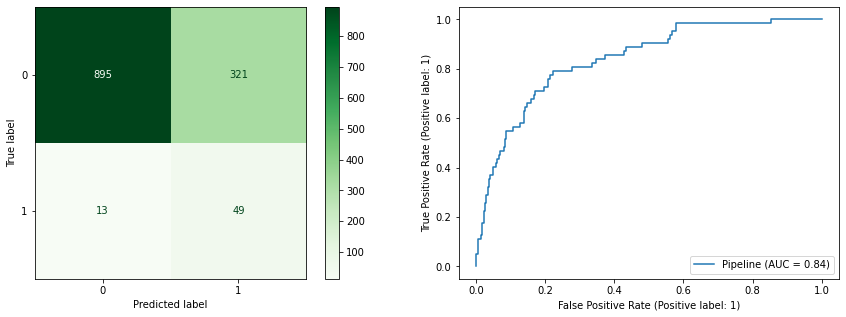

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN with undersampled data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1216
           1       0.11      0.81      0.19        62

    accuracy                           0.67      1278
   macro avg       0.55      0.74      0.49      1278
weighted avg       0.94      0.67      0.77      1278



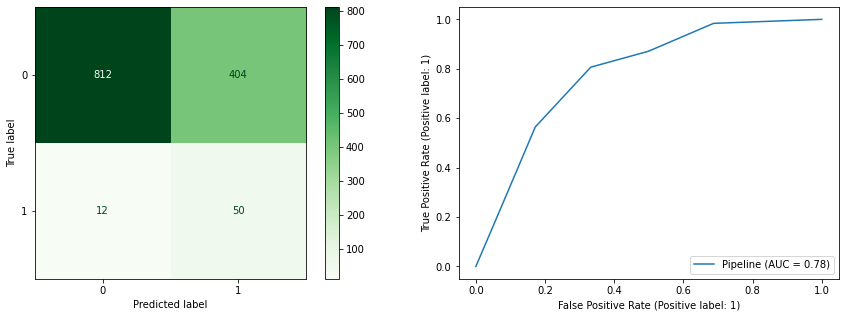

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Dummy with SMOTE data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


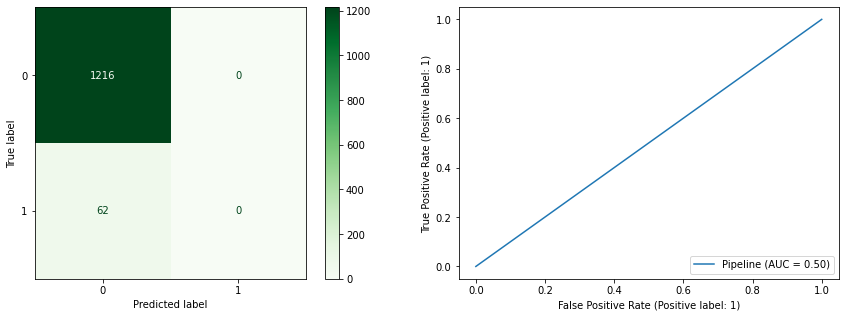

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost with SMOTE data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1216
           1       0.17      0.44      0.24        62

    accuracy                           0.87      1278
   macro avg       0.57      0.66      0.59      1278
weighted avg       0.93      0.87      0.90      1278



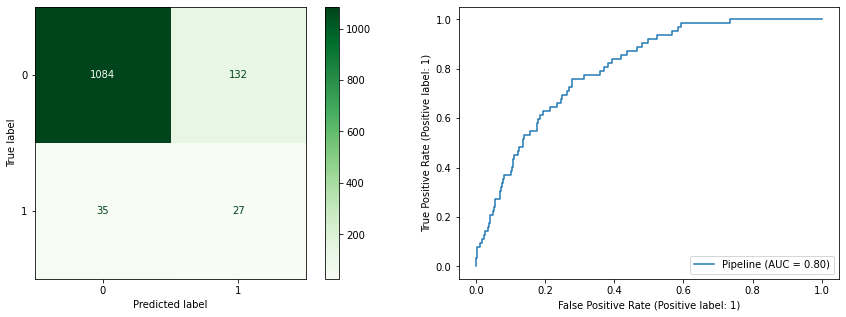

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: LogReg with SMOTE data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1216
           1       0.13      0.77      0.22        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.74      0.81      1278



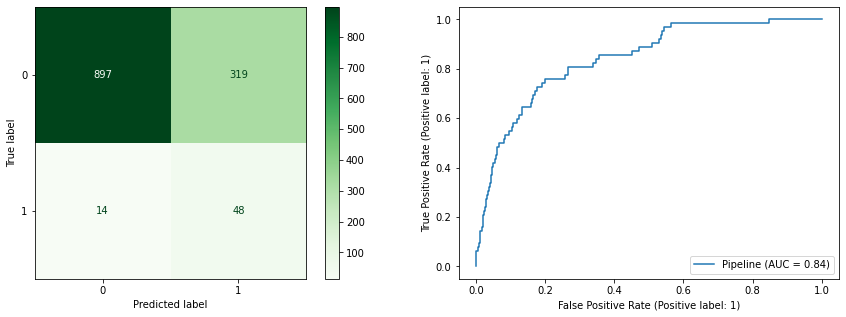

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN with SMOTE data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1216
           1       0.09      0.32      0.14        62

    accuracy                           0.80      1278
   macro avg       0.52      0.57      0.51      1278
weighted avg       0.92      0.80      0.85      1278



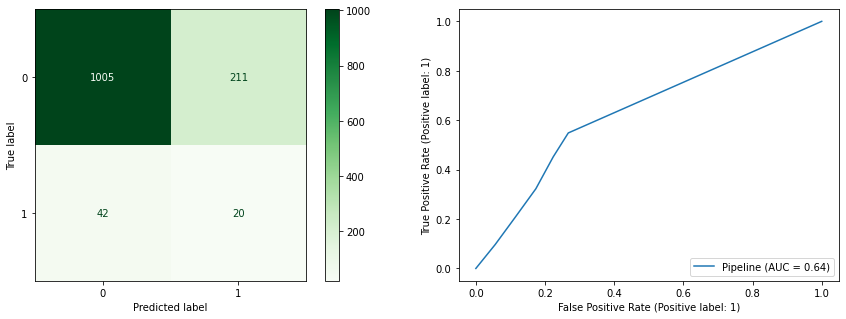

In [60]:
# Evaluate models
model_dict = {'Dummy with base data':dummy_pipe_base, 
              'XGBoost with base data':xgb_pipe_base, 
              'LogReg with base data':lg_pipe_base, 
              'KNN with base data':knn_pipe_base, 
              'Dummy with undersampled data':dummy_pipe_under, 
              'XGBoost with undersampled data':xgb_pipe_under, 
              'LogReg with undersampled data':lg_pipe_under, 
              'KNN with undersampled data':knn_pipe_under,
              'Dummy with SMOTE data':dummy_pipe_smote, 
              'XGBoost with SMOTE data':xgb_pipe_smote, 
              'LogReg with SMOTE data':lg_pipe_smote, 
              'KNN with SMOTE data':knn_pipe_smote
              }
for key in model_dict.keys():
  evaluate_classification(model_dict[key], X_test, y_test, label = key)


## Interpretations:
**Sampling Methods**

It's clear from this exercise that addressing the class imbalance in the target is required. Without undersampling or synthetic oversampling, all of the models almost entirely predicted that no stroke would occur in this population. Due to the cost of false negatives, these models are useless. The primary metric for evaluating these models is the recall score.

The undersampling technique performed very well despite only fitting to ~10% of 75% of the total data set. It may have even performed marginally better than the SMOTE data depending on the metric and model 

**Models**

It appears that the logistic regression and the XGBoost models performed better in ROC AUC than the KNN model, indicating that these models were better able to separate strokes from no strokes. 

In this particular use-case, the cost of false negatives are high and as such, the recall was another important metric. Generally, the logistic regression model performed well in recall. The undersampled KNN also had a high recall when using undersampled data but at a huge expense to the accuracy. 


The XGBoost model had some of the higher combinations of accuracy, f1, recall, and ROC AUC when using the undersampled data. This model will move forward with the undersampling techniques for hyperparameter tuning as well as the SMOTE sampled Logistic Regression model which was another higher performing model. 



## PCA

This dataset does not have a large number of features to the point that dimensionality reduction is required to improve speed. However, there is a high degree of collinearity between the predictors. Most notably, age was highly correlated to other predictors such as heart disease, hypertension, whether someone had ever married, and several others as well as the target, strokes. 

For the sake of curiosity, we will fit and evaluate a logistic regression model with PCA transformed features just to see the impact on the performance.



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Log Reg with SMOTE & PCA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1216
           1       0.13      0.81      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.77      0.54      1278
weighted avg       0.95      0.74      0.81      1278



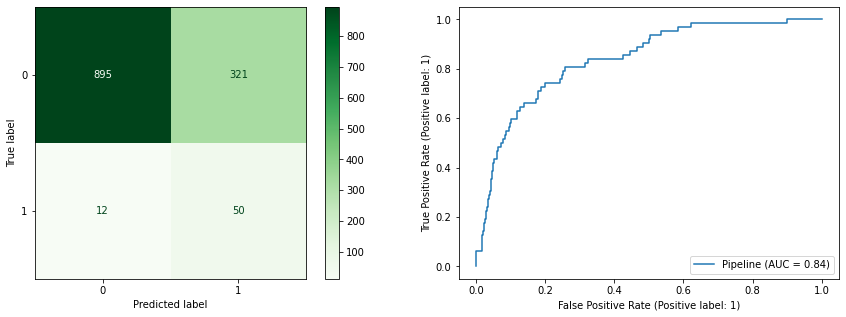

In [63]:
# Instantiate PCA, using 0.95 explained variance
pca = PCA(n_components = 0.95, random_state = 42)
lg_pca_smote_pipe = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), pca, LogisticRegression())
lg_pca_smote_pipe.fit(X_train, y_train)
evaluate_classification(lg_pca_smote_pipe, X_test, y_test, label = 'Log Reg with SMOTE & PCA')

**Interpretation**

The Logistic Regression model with SMOTE & PCA performed marginally better or equivalent in terms of accuracy, f1, ROC AUC, and recall than the Logistic Regression model with just SMOTE.

While generally PCA results in reduced information and thus a worse performing model; however, in this dataset there seems to be a slight benefit in using PCA. The logistic regression and XGBoost models will use PCA with 95% explained variance going forward. 

## Parameter Hypertuning

In [83]:
# model pipelines to optimize
xgb_pipe_under = make_sampler_pipeline(preprocessor, RandomUnderSampler(), PCA(n_components = 0.95, random_state = 42), XGBClassifier())
lg_pipe_smote = smote_pipe(preprocessor, SMOTE(sampling_strategy='auto', random_state = 42), PCA(n_components = 0.95, random_state = 42),LogisticRegression(max_iter = 1000))
print(xgb_pipe_under.get_params(), '\n')
print(lg_pipe_smote.get_params())

{'memory': None, 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f814a57f9d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f814a57ffa0>)])), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=0.95, random_state=42)), ('xgbclassifier', XGBClassifier())], 'verbose': Fal

###Logistic Regression Tuning

In [65]:
# Parameter dictionaries
log_params = ({'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'logisticregression__penalty': ['l2', 'l1'], 
               'logisticregression__solver' : ['liblinear']}, 
              {'logisticregression__solver' : ['lbfgs', 'liblinear'], 
               'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]})


In [69]:
# Log reg gridsearch
logreg_grid = GridSearchCV(lg_pipe_smote, log_params, scoring = 'f1') 
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f814a57f9d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(hand...
                                            random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=({'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                          'logisticregression__penalty': ['l2', 'l1'],
                          'logisticregression__solver': ['liblinear']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                          'logisticregression__solver': ['lbfgs',
                                                         'liblinear']}),
             scoring='f1')

In [70]:
# What are the best parameters
print('Best logistic regression Parameters:')
print(logreg_grid.best_params_)
best_pipe_log = logreg_grid.best_estimator_

Best logistic regression Parameters:
{'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best GridSearchCV Log Reg Model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1216
           1       0.13      0.81      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.77      0.53      1278
weighted avg       0.95      0.74      0.81      1278



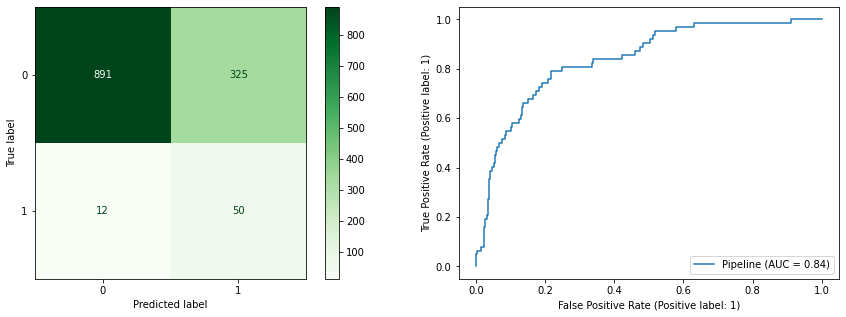

In [71]:
#Evaluating the best estimator
evaluate_classification(best_pipe_log, X_test, y_test, label = 'Best GridSearchCV Log Reg Model')

Best logistic regression Parameters:
{'logisticregression__C': 0.005, 'logisticregression__solver': 'lbfgs'}
------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best GridSearchCV Log Reg Model, Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1216
           1       0.13      0.81      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.77      0.54      1278
weighted avg       0.95      0.74      0.81      1278



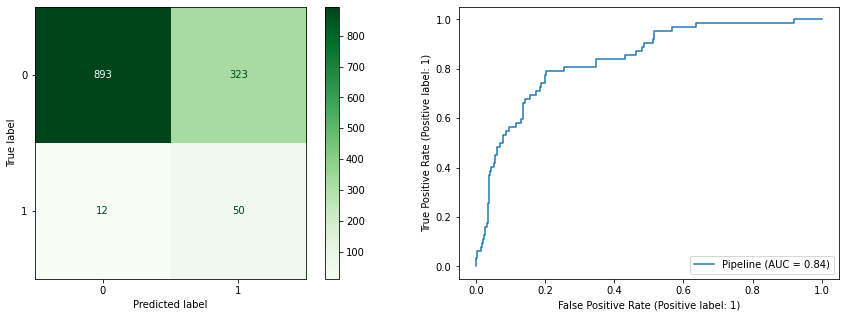

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best GridSearchCV Log Reg Model, Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3645
           1       0.14      0.83      0.24       187

    accuracy                           0.74      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.74      0.82      3832



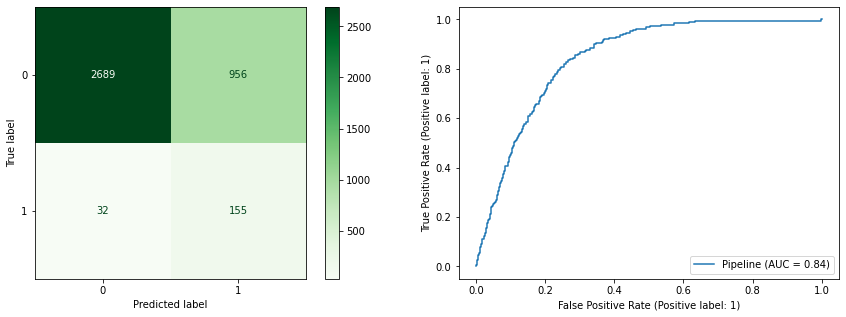

In [86]:
# Band tuning
log_params = {'logisticregression__C': [0.005, 0.01, 0.05, 0.06, 0.07, 0.08], 'logisticregression__solver': ['lbfgs']}
logreg_grid = GridSearchCV(lg_pipe_smote, log_params, scoring = 'f1') 
logreg_grid.fit(X_train, y_train)

print('Best logistic regression Parameters:')
print(logreg_grid.best_params_)
best_pipe_log = logreg_grid.best_estimator_

#Evaluating the best estimator
evaluate_classification(best_pipe_log, X_test, y_test, label = 'Best GridSearchCV Log Reg Model, Test')

# Checking for overfitting
evaluate_classification(best_pipe_log, X_train, y_train, label = 'Best GridSearchCV Log Reg Model, Train')

**Interpretation:**

This seems to be a reasonable stopping point. Logistic Regression does not often require very extensive hyperparameter tuning and the tuning that has been done has not significantly improved the model performance. There does not appear to be any overfitting as the model performed almost identically on the train and test data (we can thank cross-validation for this).

###XGBoost Tuning

In [76]:
# Certainly want to tune the max depth for any tree-based model, n_estimators and the booster also seem like good candidates.
xgb_params = {'xgbclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 
              'xgbclassifier__n_estimators': [10, 100, 1000], 
              'xgbclassifier__booster': ['gbtree', 'gblinear']}

Best logistic regression Parameters:
{'xgbclassifier__booster': 'gblinear', 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 1000}
------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best GridSearchCV XGBoost Model, Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1216
           1       0.14      0.77      0.23        62

    accuracy                           0.75      1278
   macro avg       0.56      0.76      0.54      1278
weighted avg       0.94      0.75      0.82      1278



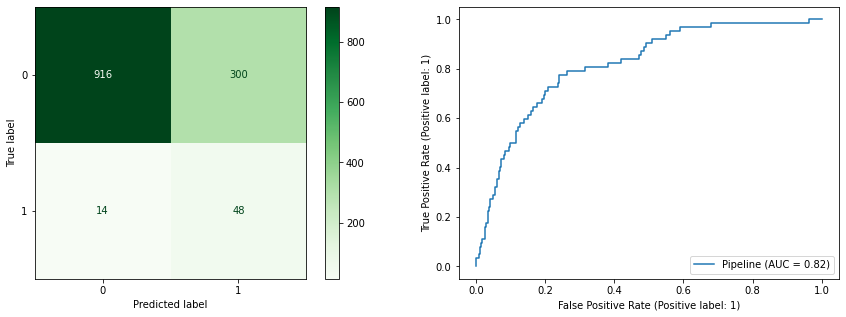

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best GridSearchCV XGBoost Model, Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      3645
           1       0.13      0.74      0.23       187

    accuracy                           0.75      3832
   macro avg       0.56      0.75      0.54      3832
weighted avg       0.94      0.75      0.82      3832



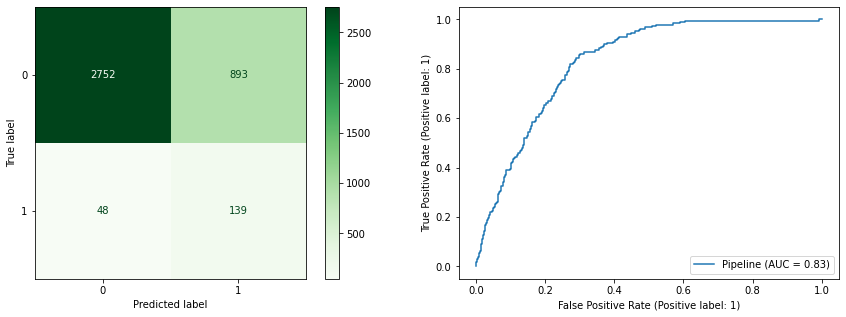

In [85]:
# Grid searching for best parameters
xgb_grid = GridSearchCV(xgb_pipe_under, xgb_params, scoring = 'f1') # f1 has given the best combinations of resulting ROC AUC, accuracy and Recall scores
xgb_grid.fit(X_train, y_train)
print('Best logistic regression Parameters:')
print(xgb_grid.best_params_)
best_pipe_xgb = xgb_grid.best_estimator_

#Evaluating the best estimator
evaluate_classification(best_pipe_xgb, X_test, y_test, label = 'Best GridSearchCV XGBoost Model, Test')

# Checking for overfitting
evaluate_classification(best_pipe_xgb, X_train, y_train, label = 'Best GridSearchCV XGBoost Model, Train')

**Interpretation:**

This model may have a slight advantage over the logistic regression model with respect to the accuracy score, however, it is slightly worse when comparing the ROC AUC and noticeably worse with recall. 

# Production Model Choice
---

Overall, the best tested model was the Logistic Regression model with SMOTE sampling, PCA with 95% retained variance, and the following hyperparameters:


{'logisticregression__C': 0.005, 'logisticregression__solver': 'lbfgs'}


This model had the best combination of f1, accuracy, ROC AUC and most importantly, recall scores. Recall was the primary evaluation metric due to the high cost of false negatives; however, there were cases when the recall score was high but there was a significant reduction in the other 3 scores. This means that the model was signicantly over predicting that people would have a stroke. While this certainly cut down on false negatives, the cost over so many false positives would be difficult to justify. Without knowing exact the cost of false negatives compared to that of false positives, the chosen model seemed to have the best combination of 4 metrics. The values of which are shown below:


| Recall | f1 | ROC AUC | Accuracy |
|--------|----|---------|----------|
| 0.81   |0.23|  0.84  |    0.74   |



## Summary
Overall, none of the models were particularly high performing including the chosen "best" model. I would have serious concerns with implementing this model to make actionable decisions such as medication or other treatments. There are simply too many false negatives and false positives for this to be an extremely effective and high confidence tool. That said, it could be used by a physician as an internal "at-risk" marking tool. This would allow the physician to keep a closer eye on patients that may have a higher risk strokes. This may led to more extensive screenings to the extremely at-risk group which could potentially save lives. 